## Load the meta data into a dataframe

In [1]:
import pandas as pd

df = pd.read_excel('../data/detector_tests/labelled_photos_file_paths.xlsx')

df


Sort  Session                                 Category            GMU  \
0          9        1            Systematic monitoring of lynx   34SercaitaBV   
1          9        1            Systematic monitoring of lynx   34SercaitaBV   
2         10        1            Systematic monitoring of lynx   34SercaitaBV   
3         11        1            Systematic monitoring of lynx   34SercaitaBV   
4         11        1            Systematic monitoring of lynx   34SercaitaBV   
...      ...      ...                                      ...            ...   
19592  18852        5  Systematic monitoring of feeding points  20StoenestiAG   
19593  18852        5  Systematic monitoring of feeding points  20StoenestiAG   
19594  18852        5  Systematic monitoring of feeding points  20StoenestiAG   
19595  18852        5  Systematic monitoring of feeding points  20StoenestiAG   
19596  18852        5  Systematic monitoring of feeding points  20StoenestiAG   

                TrapSite  Longitude   Latitude  Altitude  StartDate  \
0                  Ohaba  25.161698  45.732235       600 2018-02-08   
1                  Ohaba  25.161698  45.732235       600 2018-02-08   
2                  Ohaba  25.161698  45.732235       600 2018-02-08   
3                  Ohaba  25.161698  45.732235       600 2018-02-08   
4                  Ohaba  25.161698  45.732235       600 2018-02-08   
...                  ...        ...        ...       ...        ...   
19592  25_ColtulSoimului  25.250000  45.240000      1112 2021-03-22   
19593  25_ColtulSoimului  25.250000  45.240000      1112 2021-03-22   
19594  25_ColtulSoimului  25.250000  45.240000      1112 2021-03-22   
19595  25_ColtulSoimului  25.250000  45.240000      1112 2021-03-22   
19596  25_ColtulSoimului  25.250000  45.240000      1112 2021-03-22   

         EndDate  ... count humanpresence FCC_Master_Class  \
0     2018-04-09  ...     1             0              Fox   
1     2018-04-09  ...     1             0              Fox   
2     2018-04-09  ...     0             0          Unknown   
3     2018-04-09  ...     0             0              Fox   
4     2018-04-09  ...     1             0              Fox   
...          ...  ...   ...           ...              ...   
19592 2021-05-04  ...     2             0             Bear   
19593 2021-05-04  ...     3             1             Bear   
19594 2021-05-04  ...     3             1             Bear   
19595 2021-05-04  ...     3             1             Bear   
19596 2021-05-04  ...     3             1             Bear   

      DF(base)_Master_Class DF(sequence)_Master_Class FCC_DF(base)_Match  \
0                       Fox                       Fox               True   
1                       Fox                       Fox               True   
2                   Empty**                   Empty**              False   
3                   Empty**                       Fox              False   
4                       Fox                       Fox               True   
...                     ...                       ...                ...   
19592                  Bear                      Bear               True   
19593                  Bear                      Bear               True   
19594                  Bear                      Bear               True   
19595                  Bear                      Bear               True   
19596                  Bear                      Bear               True   

      FCC_DF(sequence)_Match DF(base)_DF(sequence)_Match Ground_Truth  \
0                       True                        True          Fox   
1                       True                        True          Fox   
2                      False                        True      Unknown   
3                       True                       False          Fox   
4                       True                        True          Fox   
...                      ...                         ...          ...   
19592        

## Plot the locations of the camera traps on a map 

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np

# Convert 'na' strings to NaN and drop rows with NaN in Longitude or Latitude
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df_clean = df.dropna(subset=['Longitude', 'Latitude'])

# Select unique locations based on Longitude and Latitude
unique_locations = df_clean[['Longitude', 'Latitude']].drop_duplicates()


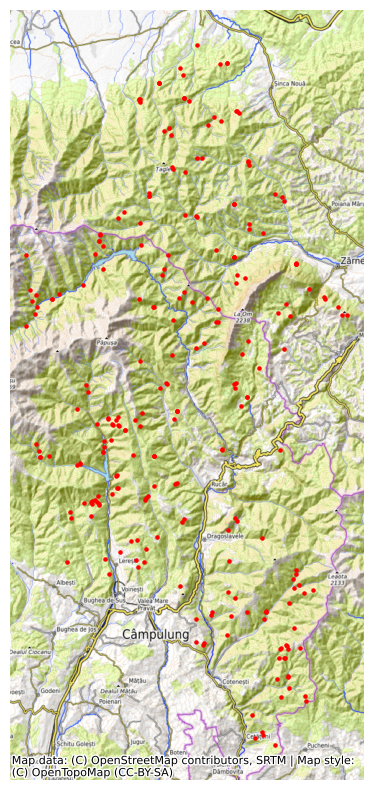

In [5]:

# Create a GeoDataFrame, specifying the coordinate reference system (CRS) as WGS84 (epsg:4326)
gdf = gpd.GeoDataFrame(unique_locations, geometry=gpd.points_from_xy(unique_locations.Longitude, unique_locations.Latitude))
gdf.crs = "EPSG:4326"

# Convert the GeoDataFrame to Web Mercator projection (epsg:3857) for use with contextily
gdf = gdf.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='red', markersize=5)
ctx.add_basemap(ax, source=ctx.providers.OpenTopoMap)
ax.set_axis_off()
plt.show()


## Plot a bar char of the count for each species

In [ ]:
# Count the occurrences of each species
species_counts = df['Species'].value_counts()

# Plot the counts as a bar chart
plt.figure(figsize=(10, 8))  # Adjust the size as needed
ax = species_counts.plot(kind='bar')
plt.title('Frequency of Each Species')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")  # Rotate species names for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Add count labels to the top of the bars
for i, v in enumerate(species_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()


## Plot the frequency of detections of wild boar on a map

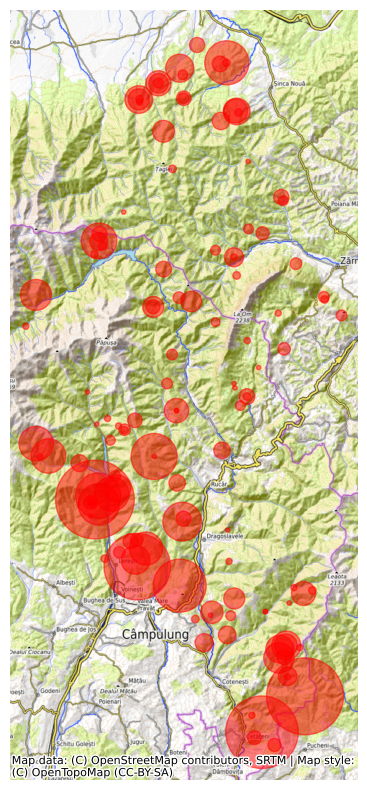

In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Filter for "Wild boar" species
wild_boar_df = df[df['Species'] == 'Wild boar']

# Count detections at each unique location
location_counts = wild_boar_df.groupby(['Longitude', 'Latitude']).size().reset_index(name='Counts')

# Create a GeoDataFrame from the filtered data
gdf = gpd.GeoDataFrame(location_counts, geometry=gpd.points_from_xy(location_counts.Longitude, location_counts.Latitude))

# Set the coordinate reference system (CRS) to WGS84
gdf.crs = 'EPSG:4326'

# Convert the GeoDataFrame to Web Mercator projection for use with contextily
gdf = gdf.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Adjust marker size based on the count of detections. The 'Counts' value is scaled to ensure visibility on the map.
gdf.plot(ax=ax, markersize=gdf['Counts']*10, color='red', alpha=0.5)

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenTopoMap)

# Remove axis for a cleaner look
ax.set_axis_off()

plt.show()

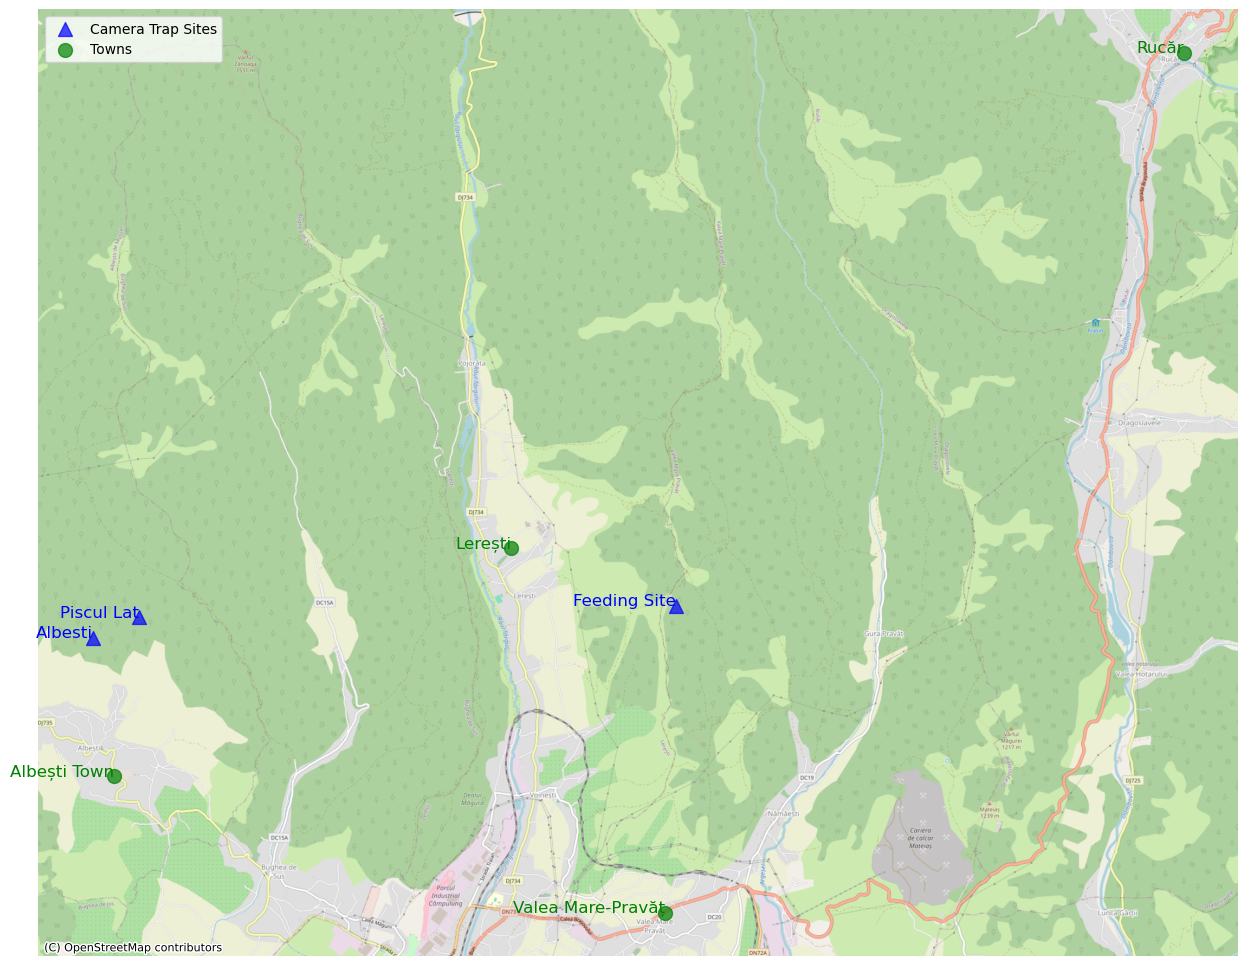

In [27]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import box

# Define the camera trap sites data
trap_sites_data = {
    'X': [25.01059634, 25.00330022, 25.09574386],
    'Y': [45.326467, 45.32415226, 45.32770572],
    'Name': ['Piscul Lat', 'Albesti', 'Feeding Site']
}

# Create a DataFrame for the trap sites
trap_sites_df = pd.DataFrame(trap_sites_data)

# Create a GeoDataFrame from the trap sites data
trap_sites_gdf = gpd.GeoDataFrame(trap_sites_df, geometry=gpd.points_from_xy(trap_sites_df.X, trap_sites_df.Y))

# Set the CRS for the trap sites GeoDataFrame to WGS84
trap_sites_gdf.crs = 'EPSG:4326'

# Convert the trap sites GeoDataFrame to Web Mercator projection
trap_sites_gdf = trap_sites_gdf.to_crs(epsg=3857)

# Define the towns data
towns_data = {
    'X': [25.0940, 25.1761, 25.0696, 25.00666789592026],
    'Y': [45.2935, 45.3893, 45.3342, 45.30880113705865],
    'Name': ['Valea Mare-Pravăț', 'Rucăr', 'Lerești', 'Albești Town']
}

# Create a DataFrame for the towns
towns_df = pd.DataFrame(towns_data)

# Create a GeoDataFrame from the towns data
towns_gdf = gpd.GeoDataFrame(towns_df, geometry=gpd.points_from_xy(towns_df.X, towns_df.Y))

# Set the CRS for the towns GeoDataFrame to WGS84
towns_gdf.crs = 'EPSG:4326'

# Convert the towns GeoDataFrame to Web Mercator projection
towns_gdf = towns_gdf.to_crs(epsg=3857)

# Calculate the extent of the map based on town locations with a small buffer
buffer = 0.05  # degrees
min_x = towns_df['X'].min() - buffer
max_x = towns_df['X'].max() + buffer
min_y = towns_df['Y'].min() - buffer
max_y = towns_df['Y'].max() + buffer

# Create a bounding box for the extent
bounding_box = box(min_x, min_y, max_x, max_y)
bounding_box_gdf = gpd.GeoDataFrame(geometry=[bounding_box], crs='EPSG:4326').to_crs(epsg=3857)
extent = bounding_box_gdf.total_bounds

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the trap sites with different markers
trap_sites_gdf.plot(ax=ax, markersize=100, color='blue', marker='^', alpha=0.7, label='Camera Trap Sites')

# Plot the towns with different markers
towns_gdf.plot(ax=ax, markersize=100, color='green', marker='o', alpha=0.7, label='Towns')

# Add labels for the trap sites
for x, y, label in zip(trap_sites_gdf.geometry.x, trap_sites_gdf.geometry.y, trap_sites_gdf['Name']):
    ax.text(x, y, label, fontsize=12, ha='right', color='blue')

# Add labels for the towns
for x, y, label in zip(towns_gdf.geometry.x, towns_gdf.geometry.y, towns_gdf['Name']):
    ax.text(x, y, label, fontsize=12, ha='right', color='green')

# Add a high-resolution basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=14)

# Set the extent of the map to focus on the four towns
#ax.set_xlim(extent[0], extent[2])
# ax.set_ylim(extent[1], extent[3])

# Remove axis for a cleaner look
ax.set_axis_off()

# Add a legend
plt.legend()

# Remove white border
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

plt.show()


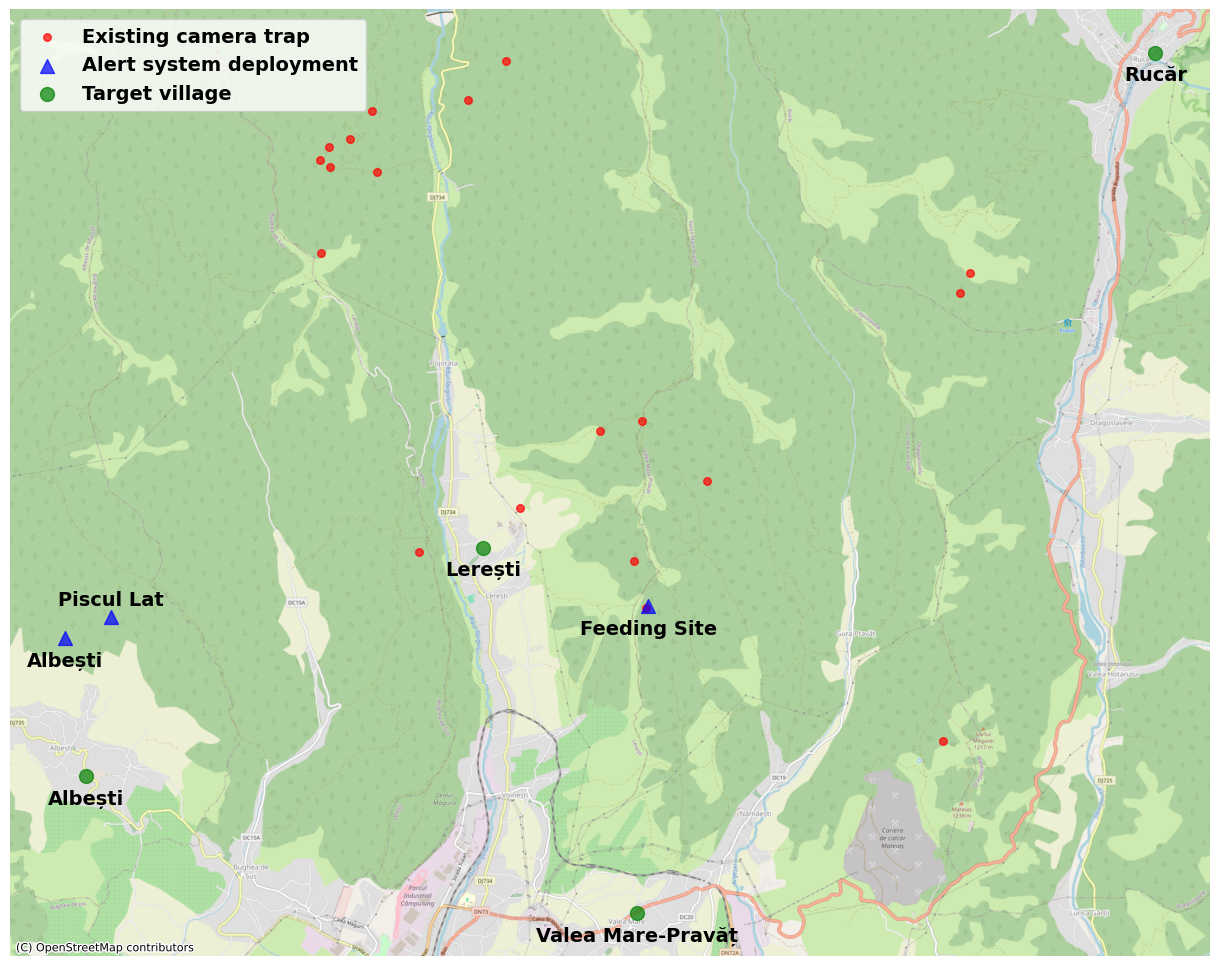

In [65]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Assuming df is the initial DataFrame with wild boar data
# Filter for "Wild boar" species
wild_boar_df = df[df['Species'] == 'Wild boar']

# Count detections at each unique location
location_counts = wild_boar_df.groupby(['Longitude', 'Latitude']).size().reset_index(name='Counts')

# Create a GeoDataFrame from the filtered data
gdf = gpd.GeoDataFrame(location_counts, geometry=gpd.points_from_xy(location_counts.Longitude, location_counts.Latitude))

# Set the coordinate reference system (CRS) to WGS84
gdf.crs = 'EPSG:4326'

# Define the camera trap sites data
trap_sites_data = {
    'X': [25.01059634, 25.00330022, 25.09574386],
    'Y': [45.326467, 45.32415226, 45.32770572],
    'Name': ['Piscul Lat', 'Albești', 'Feeding Site']
}

# Create a DataFrame for the trap sites
trap_sites_df = pd.DataFrame(trap_sites_data)

# Create a GeoDataFrame from the trap sites data
trap_sites_gdf = gpd.GeoDataFrame(trap_sites_df, geometry=gpd.points_from_xy(trap_sites_df.X, trap_sites_df.Y))

# Set the CRS for the trap sites GeoDataFrame to WGS84
trap_sites_gdf.crs = 'EPSG:4326'

# Convert the trap sites GeoDataFrame to Web Mercator projection
trap_sites_gdf = trap_sites_gdf.to_crs(epsg=3857)

# Define the towns data
towns_data = {
    'X': [25.0940, 25.1761, 25.0696, 25.00666789592026],
    'Y': [45.2935, 45.3893, 45.3342, 45.30880113705865],
    'Name': ['Valea Mare-Pravăț', 'Rucăr', 'Lerești', 'Albești']
}

# Create a DataFrame for the towns
towns_df = pd.DataFrame(towns_data)

# Create a GeoDataFrame from the towns data
towns_gdf = gpd.GeoDataFrame(towns_df, geometry=gpd.points_from_xy(towns_df.X, towns_df.Y))

# Set the CRS for the towns GeoDataFrame to WGS84
towns_gdf.crs = 'EPSG:4326'

# Convert the towns GeoDataFrame to Web Mercator projection
towns_gdf = towns_gdf.to_crs(epsg=3857)

# Calculate the northernmost, southernmost, westernmost, and easternmost bounds from the towns
north_bound = towns_df['Y'].max()
south_bound = towns_df['Y'].min()
west_bound = towns_df['X'].min()
east_bound = towns_df['X'].max()

# Filter the unique locations to be within the bounds
filtered_gdf = gdf[(gdf['Latitude'] <= north_bound) & (gdf['Latitude'] >= south_bound) &
                   (gdf['Longitude'] >= west_bound) & (gdf['Longitude'] <= east_bound)].to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the existing camera traps as small dots
filtered_gdf.plot(ax=ax, markersize=30, color='red', alpha=0.7, label='Existing camera trap')

# Plot the trap sites with different markers
trap_sites_gdf.plot(ax=ax, markersize=100, color='blue', marker='^', alpha=0.7, label='Alert system deployment')

# Plot the towns with different markers
towns_gdf.plot(ax=ax, markersize=100, color='green', marker='o', alpha=0.7, label='Target village')

# Add labels for the trap sites with special handling for "Piscul Lat"
for x, y, label in zip(trap_sites_gdf.geometry.x, trap_sites_gdf.geometry.y, trap_sites_gdf['Name']):
    if label == 'Piscul Lat':
        ax.text(x, y + 200, label, fontsize=14, ha='center', color='black', fontweight='bold')  # Position above
    else:
        ax.text(x, y - 500, label, fontsize=14, ha='center', color='black', fontweight='bold')  # Position below

# Add labels for the towns
for x, y, label in zip(towns_gdf.geometry.x, towns_gdf.geometry.y, towns_gdf['Name']):
    ax.text(x, y - 500, label, fontsize=14, ha='center', color='black', fontweight='bold')  # Position below


# Add a high-resolution basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=14)

# Remove axis for a cleaner look
ax.set_axis_off()

# Add a legend with bold font and size 16
legend = plt.legend(fontsize=14, title_fontsize=14, loc='upper left')
for text in legend.get_texts():
    text.set_fontweight('bold')
    

# Remove white border
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

plt.show()


/tmp/ipykernel_17495/3496566525.py:106: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  romania = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).query("name == 'Romania'")


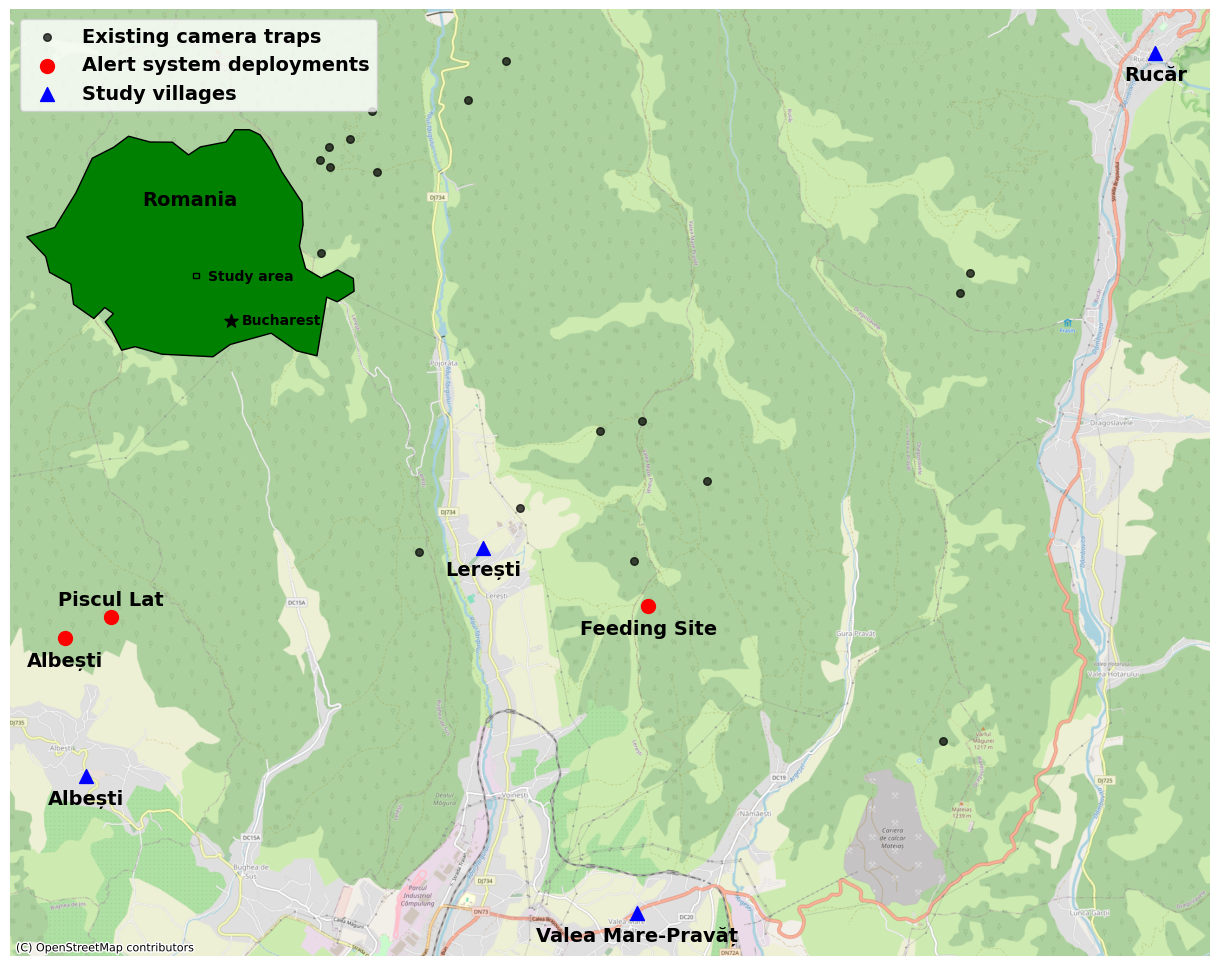

In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import box, Point
import matplotlib.patches as patches

# Assuming df is the initial DataFrame with wild boar data
# Filter for "Wild boar" species
wild_boar_df = df[df['Species'] == 'Wild boar']

# Count detections at each unique location
location_counts = wild_boar_df.groupby(['Longitude', 'Latitude']).size().reset_index(name='Counts')

# Create a GeoDataFrame from the filtered data
gdf = gpd.GeoDataFrame(location_counts, geometry=gpd.points_from_xy(location_counts.Longitude, location_counts.Latitude))

# Set the coordinate reference system (CRS) to WGS84
gdf.crs = 'EPSG:4326'

# Define the camera trap sites data
trap_sites_data = {
    'X': [25.01059634, 25.00330022, 25.09574386],
    'Y': [45.326467, 45.32415226, 45.32770572],
    'Name': ['Piscul Lat', 'Albești', 'Feeding Site']
}

# Create a DataFrame for the trap sites
trap_sites_df = pd.DataFrame(trap_sites_data)

# Create a GeoDataFrame from the trap sites data
trap_sites_gdf = gpd.GeoDataFrame(trap_sites_df, geometry=gpd.points_from_xy(trap_sites_df.X, trap_sites_df.Y))

# Set the CRS for the trap sites GeoDataFrame to WGS84
trap_sites_gdf.crs = 'EPSG:4326'

# Convert the trap sites GeoDataFrame to Web Mercator projection
trap_sites_gdf = trap_sites_gdf.to_crs(epsg=3857)

# Define the towns data
towns_data = {
    'X': [25.0940, 25.1761, 25.0696, 25.00666789592026],
    'Y': [45.2935, 45.3893, 45.3342, 45.30880113705865],
    'Name': ['Valea Mare-Pravăț', 'Rucăr', 'Lerești', 'Albești']
}

# Create a DataFrame for the towns
towns_df = pd.DataFrame(towns_data)

# Create a GeoDataFrame from the towns data
towns_gdf = gpd.GeoDataFrame(towns_df, geometry=gpd.points_from_xy(towns_df.X, towns_df.Y))

# Set the CRS for the towns GeoDataFrame to WGS84
towns_gdf.crs = 'EPSG:4326'

# Convert the towns GeoDataFrame to Web Mercator projection
towns_gdf = towns_gdf.to_crs(epsg=3857)

# Calculate the northernmost, southernmost, westernmost, and easternmost bounds from the towns
north_bound = towns_df['Y'].max()
south_bound = towns_df['Y'].min()
west_bound = towns_df['X'].min()
east_bound = towns_df['X'].max()

# Filter the unique locations to be within the bounds
filtered_gdf = gdf[(gdf['Latitude'] <= north_bound) & (gdf['Latitude'] >= south_bound) &
                   (gdf['Longitude'] >= west_bound) & (gdf['Longitude'] <= east_bound)].to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the existing camera traps as small dots
filtered_gdf.plot(ax=ax, markersize=30, color='black', marker='o', alpha=0.7, label='Existing camera traps')

# Plot the trap sites with different markers
trap_sites_gdf.plot(ax=ax, markersize=100, color='red', marker='o', alpha=1.0, label='Alert system deployments')

# Plot the towns with different markers
towns_gdf.plot(ax=ax, markersize=100, color='blue', marker='^', alpha=1.0, label='Study villages')

# Add labels for the trap sites with special handling for "Piscul Lat"
for x, y, label in zip(trap_sites_gdf.geometry.x, trap_sites_gdf.geometry.y, trap_sites_gdf['Name']):
    if label == 'Piscul Lat':
        ax.text(x, y + 200, label, fontsize=14, ha='center', color='black', fontweight='bold')  # Position above
    else:
        ax.text(x, y - 500, label, fontsize=14, ha='center', color='black', fontweight='bold')  # Position below

# Add labels for the towns
for x, y, label in zip(towns_gdf.geometry.x, towns_gdf.geometry.y, towns_gdf['Name']):
    ax.text(x, y - 500, label, fontsize=14, ha='center', color='black', fontweight='bold')  # Position below

# Add a high-resolution basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=14)

# Remove axis for a cleaner look
ax.set_axis_off()

# Add a legend with bold font and size 14
legend = plt.legend(fontsize=14, title_fontsize=14, loc='upper left')
for text in legend.get_texts():
    text.set_fontweight('bold')

# Add an inset map
inset_ax = fig.add_axes([0, 0.55, 0.3, 0.3])

romania = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).query("name == 'Romania'")
romania.to_crs(epsg=3857).plot(ax=inset_ax, color='green', edgecolor='black', zorder=1)

# Add Bucharest to the inset map
bucharest = gpd.GeoDataFrame(geometry=[Point(26.1025, 44.4268)], crs='EPSG:4326').to_crs(epsg=3857)
bucharest.plot(ax=inset_ax, marker='*', color='black', markersize=100, zorder=2)

# Add the larger map extent to the inset map with a red square marker
main_map_extent = box(west_bound, south_bound, east_bound, north_bound)
main_map_gdf = gpd.GeoDataFrame(geometry=[main_map_extent], crs='EPSG:4326').to_crs(epsg=3857)
main_map_gdf.boundary.plot(ax=inset_ax, color='black', linewidth=1, zorder=2)

# Add "Romania" label to the inset map
inset_ax.text(0.5, 0.65, 'Romania', fontsize=14, ha='center', fontweight='bold', transform=inset_ax.transAxes, zorder=3)

inset_ax.text(0.67, 0.35, 'Study area', fontsize=10, ha='center', fontweight='bold', transform=inset_ax.transAxes, zorder=3)

inset_ax.text(0.755, 0.173, 'Bucharest', fontsize=10, ha='center', fontweight='bold', transform=inset_ax.transAxes, zorder=3)

# Remove axis for inset map
inset_ax.set_axis_off()

# Remove white border
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

plt.show()
